In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = sns.load_dataset('tips')

In [90]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [93]:
pd.get_dummies(df['sex'],dtype=int)

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


In [94]:
df = pd.concat([df , pd.get_dummies(df['sex'],dtype=int)],axis=1)

In [95]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Female
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [96]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [97]:
df = pd.concat([df , pd.get_dummies(df['day'],drop_first=True,dtype=int)],axis=1)

In [98]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Female,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,0,0,1


In [99]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [100]:
df = pd.concat([df , pd.get_dummies(df['time'],dtype=int)],axis=1)

In [101]:
df = df.drop(['time','day','sex'],axis=1)

In [102]:
df.head()

,total_bill,tip,smoker,size,Male,Female,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,No,2,0,1,0,0,1,0,1
1,10.34,1.66,No,3,1,0,0,0,1,0,1
2,21.01,3.50,No,3,1,0,0,0,1,0,1
3,23.68,3.31,No,2,1,0,0,0,1,0,1
4,24.59,3.61,No,4,0,1,0,0,1,0,1


In [103]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [104]:
df['smoker'] = df['smoker'].map({'No':0, 'Yes':1})

In [105]:
df.head()

,total_bill,tip,smoker,size,Male,Female,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,0,2,0,1,0,0,1,0,1
1,10.34,1.66,0,3,1,0,0,0,1,0,1
2,21.01,3.50,0,3,1,0,0,0,1,0,1
3,23.68,3.31,0,2,1,0,0,0,1,0,1
4,24.59,3.61,0,4,0,1,0,0,1,0,1


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   smoker      244 non-null    category
 3   size        244 non-null    int64   
 4   Male        244 non-null    int32   
 5   Female      244 non-null    int32   
 6   Fri         244 non-null    int32   
 7   Sat         244 non-null    int32   
 8   Sun         244 non-null    int32   
 9   Lunch       244 non-null    int32   
 10  Dinner      244 non-null    int32   
dtypes: category(1), float64(2), int32(7), int64(1)
memory usage: 12.9 KB


<Axes: >

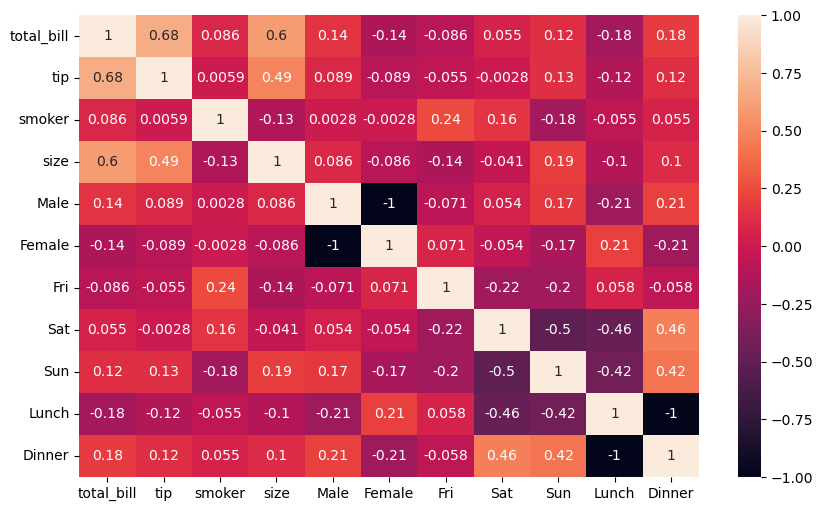

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [107]:
df['smoker'] = df['smoker'].astype(int)

In [108]:
X = df.drop('smoker',axis=1)
y = df['smoker']

In [109]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [110]:
numeric_cols = ['total_bill','tip']

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
X_train['total_bill']

61     13.81
146    18.64
52     34.81
66     16.45
26     13.37
       ...  
67      3.07
192    28.44
117    10.65
47     32.40
172     7.25
Name: total_bill, Length: 170, dtype: float64

In [113]:
for i in numeric_cols:
    X_train[i] = scaler.fit_transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [114]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))


0.6621621621621622


In [115]:
from sklearn.naive_bayes import BernoulliNB
bnlli = BernoulliNB()
bnlli.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))


0.6621621621621622
